# 單純繪製損益圖

ATM:  13076
r:  0.01
共有3個部位: ['short_call', 'short_call', 'long_put']
履約價 [13400, 13400, 13600]
價格 [161, 161, 97]


,short_call_13400,short_call_13400,long_put_13600,total
strike,,,,
12050,161,161,1453,1775
12100,161,161,1403,1725
12150,161,161,1353,1675
12200,161,161,1303,1625
12250,161,161,1253,1575
12300,161,161,1203,1525
12350,161,161,1153,1475
12400,161,161,1103,1425
12450,161,161,1053,1375


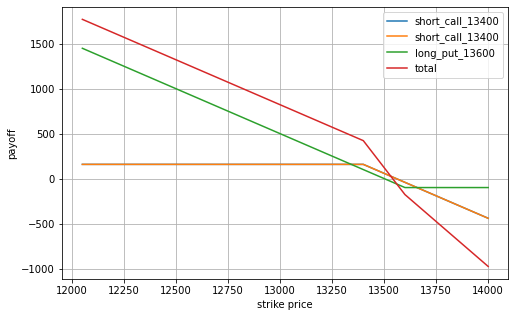

In [29]:
def long_call_price(K, C):
    PL_ls = list(map(lambda x: max(x-K, 0)-C, strike))
    return PL_ls

def long_put_price(K, C):
    PL_ls = list(map(lambda x: max(K-x, 0)-C, strike))
    return PL_ls

def short_call_price(K, C):
    PL_ls = list(map(lambda x: C-max(x-K, 0), strike))
    return PL_ls

def short_put_price(K, C):
    PL_ls = list(map(lambda x: C-max(K-x, 0), strike))
    return PL_ls

import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd
import math

#初始設定
flag = 1000
ATM = 13076
r=0.01
print('ATM: ', ATM)
print('r: ', r)

strike =np.arange(ATM - ATM%50-flag, ATM - ATM%50+flag, 50)

strike_type_dict = {1:'long_call',
            2:'short_call',
            3:'long_put',
            4:'short_put',
            0:'leave'}

type_ls = ['short_call', 'short_call', 'long_put']
strike_ls = [13400, 13400, 13600]
payoff_ls = [161, 161, 97]

print(f'共有{len(type_ls)}個部位:', type_ls)
print(f'履約價',strike_ls)
print(f'價格',payoff_ls)

dfs = pd.DataFrame()
columns_ls = []

for i in range(len(type_ls)):
    strike_type = type_ls[i]
    strike_price = strike_ls[i]
    payoff_price = payoff_ls[i]
    
    if strike_type == 'long_call':
        payoff = long_call_price(strike_price, payoff_price)
        
    elif strike_type == 'short_call':
        payoff = short_call_price(strike_price, payoff_price)

    elif strike_type == 'long_put':
        payoff = long_put_price(strike_price, payoff_price)

    elif strike_type == 'short_put':
        payoff = short_put_price(strike_price, payoff_price)
    
    columns_ls.append(strike_type + '_' + str(strike_price))
    
    df = pd.DataFrame({'strike':strike, 'payoff':payoff}).set_index('strike')
    dfs = pd.concat([dfs,df], axis=1)
    
dfs.columns = columns_ls
dfs['total'] = dfs.sum(axis=1)

display(dfs)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(dfs.index, dfs.iloc[:,:-1], alpha=1, label=type_ls)#個別
ax.plot(dfs.index, dfs['total'], alpha=1)#最後加總縣
plt.legend(dfs.columns)
plt.grid(axis='both')
plt.xlabel('strike price')
plt.ylabel('payoff')
plt.show()